In [13]:
from pathlib import Path

import albumentations as A
import numpy as np
import cv2
import ipywidgets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
from tqdm.auto import tqdm
tqdm.pandas()

In [2]:
%load_ext autoreload
%autoreload 2
from nncomp_molecule import constants

In [3]:
PREPROCESSED_DIR = constants.INPUTDIR / "kfujikawa" / "bms-preprocess-v2"

In [4]:
train_df = pd.read_pickle(PREPROCESSED_DIR / "train.pkl").assign(train=True)
test_df = pd.read_pickle(PREPROCESSED_DIR / "test.pkl").assign(train=False)
merged_df = pd.concat([train_df, test_df], ignore_index=True)

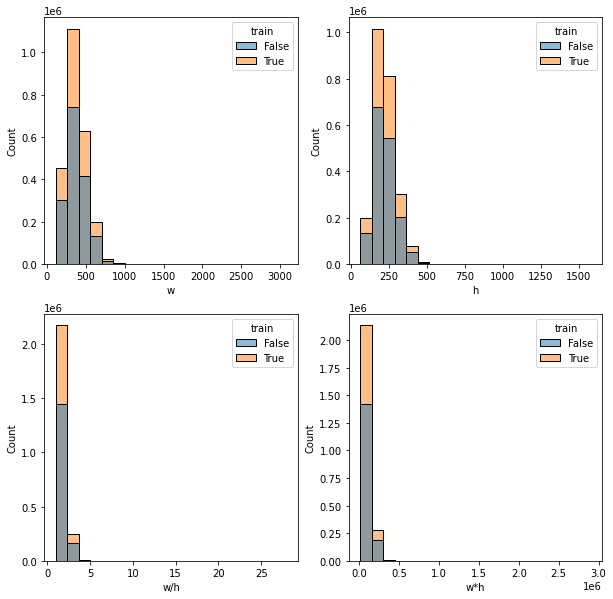

In [5]:
%matplotlib inline
fig, axes = plt.subplots(2,2, figsize=(10, 10))

for i, x in enumerate(["w", "h", "w/h", "w*h"]):
    ax = axes[i // 2][i % 2]
    sns.histplot(merged_df, ax=ax, x=x, hue="train", bins=20)

In [6]:
with pd.option_context("display.float_format", '{:.2f}'.format, "display.max_columns", None):
    display(merged_df[["w", "h", "w/h", "w*h", "train"]].groupby("train").agg(["max", "min", "mean", "median"]))

w                        h                     w/h                   \
        max  min   mean median   max min   mean median   max  min mean median   
train                                                                           
False  3043  114 381.05    360  1578  68 219.79    211 27.92 1.00 1.78   1.71   
True   3078  117 380.96    360  1537  60 219.82    211 27.15 1.00 1.78   1.71   

           w*h                         
           max    min     mean median  
train                                  
False  2900364  11439 90328.11  76212  
True   2648251  11466 90351.68  76162

In [29]:
target_area = 1024 ** 2

def calc_wh(x):
    w = int(np.sqrt(target_area / (x.h / x.w)))
    h = int(np.sqrt(target_area / (x.w / x.h)))
    return dict(w=w, h=h)

wh_df = merged_df.progress_apply(calc_wh, axis=1, result_type="expand")
wh_df.max()

w    5410
h    1024
dtype: int64

In [28]:
np.ceil(wh_df.max() / 16) * 16

w    2720.0
h     512.0
dtype: float64